In [448]:
from ctypes import windll
#from sympy.physics.units.definitions.unit_definitions import ms
windll.shcore.SetProcessDpiAwareness(1)
import tkinter as tk

#由你的电脑的屏幕大小来决定

def get_screen_size():
    root = tk.Tk()
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    root.destroy()
    return screen_width, screen_height
screen_wide,screen_high=get_screen_size()

print(screen_wide,screen_high  )


2560 1600


相同的DW下，16次实验，目的：探究距离的影响

1.读取数据

In [449]:
d1,d2=2500,2500
w1,w2=20,20



import pickle
import sys

def read_data(d1,d2,w1,w2):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

    with open(name,'rb') as file:
        move_datas=pickle.load(file)
    
    return move_datas

mouse_move=read_data(d1,d2,w1,w2)

mouse_move中，顺序是：第几条轨迹，第几个时间点，当前的位置（t,x,y）

In [450]:
import numpy as np
for i in range(len(mouse_move)):
    print(np.shape(mouse_move[i]))
print(mouse_move[0][0])

(369869, 3)
(338215, 3)
(455161, 3)
(375102, 3)
(303763, 3)
(422544, 3)
(350565, 3)
(542340, 3)
(406945, 3)
(432088, 3)
(329158, 3)
(390198, 3)
(303364, 3)
(402685, 3)
(316220, 3)
(474894, 3)
(1690956901.6092992, 28.0, 802.0)


对单条轨迹进行判断，使用冒泡算法，当前后点相同时,t相同，删除轨迹点

In [451]:
def clean(mouse_move):
    new1=[]
    for i in range(len(mouse_move)):
        new2=[]
        t=-1
        x=-1
        y=-1
        for j in range(len(mouse_move[i])):
            
            if t==mouse_move[i][j][0] and x==mouse_move[i][j][1] and y==mouse_move[i][j][2]:
                t=mouse_move[i][j][0]
                x=mouse_move[i][j][1]
                y=mouse_move[i][j][2]
                continue
            else:
                t=mouse_move[i][j][0]
                x=mouse_move[i][j][1]
                y=mouse_move[i][j][2]
                new2.append(mouse_move[i][j])
        new1.append(new2)
    return new1

mouse_move=clean(mouse_move)

对于其中某些点进行处理，如果时间相同则，将其时间取前后时间的平均，

In [452]:
def average(mouse_move):
    new=[]
    for i in range(len(mouse_move)):
        new1=[]
        for j in range(len(mouse_move[i])-1):
            t=mouse_move[i][j][0]
            if mouse_move[i][j][0]==mouse_move[i][j+1][0]:
                r=1
                for k in range(j+1,len(mouse_move[i])-1):
                    if mouse_move[i][j][0]==mouse_move[i][k][0]:
                        r+=1
                        #print(k)
                #print('对于',mouse_move[i][j][0],'有',r,'个连续重复值')
                
                t0=mouse_move[i][j-1][0]
                t1=mouse_move[i][j+r][0]
                m=(t1-t0)/(r+1)
                t=t0+m*2
                
            new1.append([t,mouse_move[i][j][1],mouse_move[i][j][2]])
        new.append(new1)    
    
    for i in range(len(new)):
        for j in range(len(new[i])-1):
            if new[i][j][0]==new[i][j+1][0]:
                print('存在前后相同点：',i,j)
    
    return new

#mouse_move=average(mouse_move)



In [453]:
import numpy as np
t=[]
for i in range(len(mouse_move)):
    print(np.shape(mouse_move[i]))
    print(mouse_move[i][-1][0]-mouse_move[i][0][0])
    t.append(mouse_move[i][-1][0]-mouse_move[i][0][0])

print('平均时间为',np.mean(t))

(2082, 3)
1.1695070266723633
(1364, 3)
0.9243683815002441
(2109, 3)
1.303900957107544
(1742, 3)
1.0753943920135498
(1447, 3)
0.890775203704834
(1992, 3)
1.2255547046661377
(1675, 3)
1.0474371910095215
(2611, 3)
1.646207332611084
(1718, 3)
1.1653730869293213
(2221, 3)
1.3046178817749023
(1495, 3)
0.9850335121154785
(2258, 3)
1.2497129440307617
(1464, 3)
0.9263460636138916
(1632, 3)
1.1350090503692627
(1726, 3)
0.988720178604126
(1728, 3)
1.2953896522521973
平均时间为 1.1458342224359512


2.将轨迹数据转换为pd.DataFrame格式

In [454]:
import pandas as pd

Track={}
for i in range(len(mouse_move)):
    Track[i]=pd.DataFrame(mouse_move[i])
    Track[i].columns=['t','x','y']
    


3.计算轨迹数据中的其他相关项（速度，角度，距离）

#进行y方向平滑处理

In [455]:
import numpy as np




def identify(data):
    #识别异常值
    
    # 计算均值和标准差
    mean_val = np.mean(data)
    std_val = np.std(data)

    # 定义阈值（这里使用2个标准差作为阈值）
    threshold = 3 * std_val

    # 识别异常值
    outliers = [x for x in data if abs(x - mean_val) > threshold]

    # 替换异常值（这里使用均值来替换）
    for outlier in outliers:
        data[data.index(outlier)] = mean_val + (np.random.rand(1)[0])*threshold


    return data



def setValue(Track):
    '''
        计算速度和时间
    '''
    trace=[]
    for i in range(len(Track)):
        T=Track[i].t.values.tolist()
        X=Track[i].x.values.tolist()
        Y=Track[i].y.values.tolist()
        
        #将时间标准化
        t0=T[0]
        for i in range(len(T)):
            T[i]=T[i]-t0
    
        s=0
        S=[0,]#点在轨迹上的位置
        for i in range(1,len(X)):
            s+=np.sqrt((X[i]-X[i-1])**2+(Y[i]-Y[i-1])**2)
            S.append(s)
            
        pandasDataSet=[]
        for i in range(len(X)):
            pandasDataSet.append((T[i],X[i],Y[i],S[i]))
        
        trace.append(pd.DataFrame(pandasDataSet,columns=['t','x','y','s',]))
        
    return trace

Track=setValue(Track)
print(Track[0])


             t       x      y            s
0     0.000000    28.0  802.0     0.000000
1     0.000999    28.0  802.0     0.000000
2     0.002028    28.0  802.0     0.000000
3     0.003020    28.0  802.0     0.000000
4     0.004018    28.0  802.0     0.000000
...        ...     ...    ...          ...
2077  1.166529  2527.0  804.0  2533.047911
2078  1.167508  2527.0  804.0  2533.047911
2079  1.167570  2527.0  804.0  2533.047911
2080  1.168508  2527.0  804.0  2533.047911
2081  1.169507  2527.0  804.0  2533.047911

[2082 rows x 4 columns]


进行滤波处理

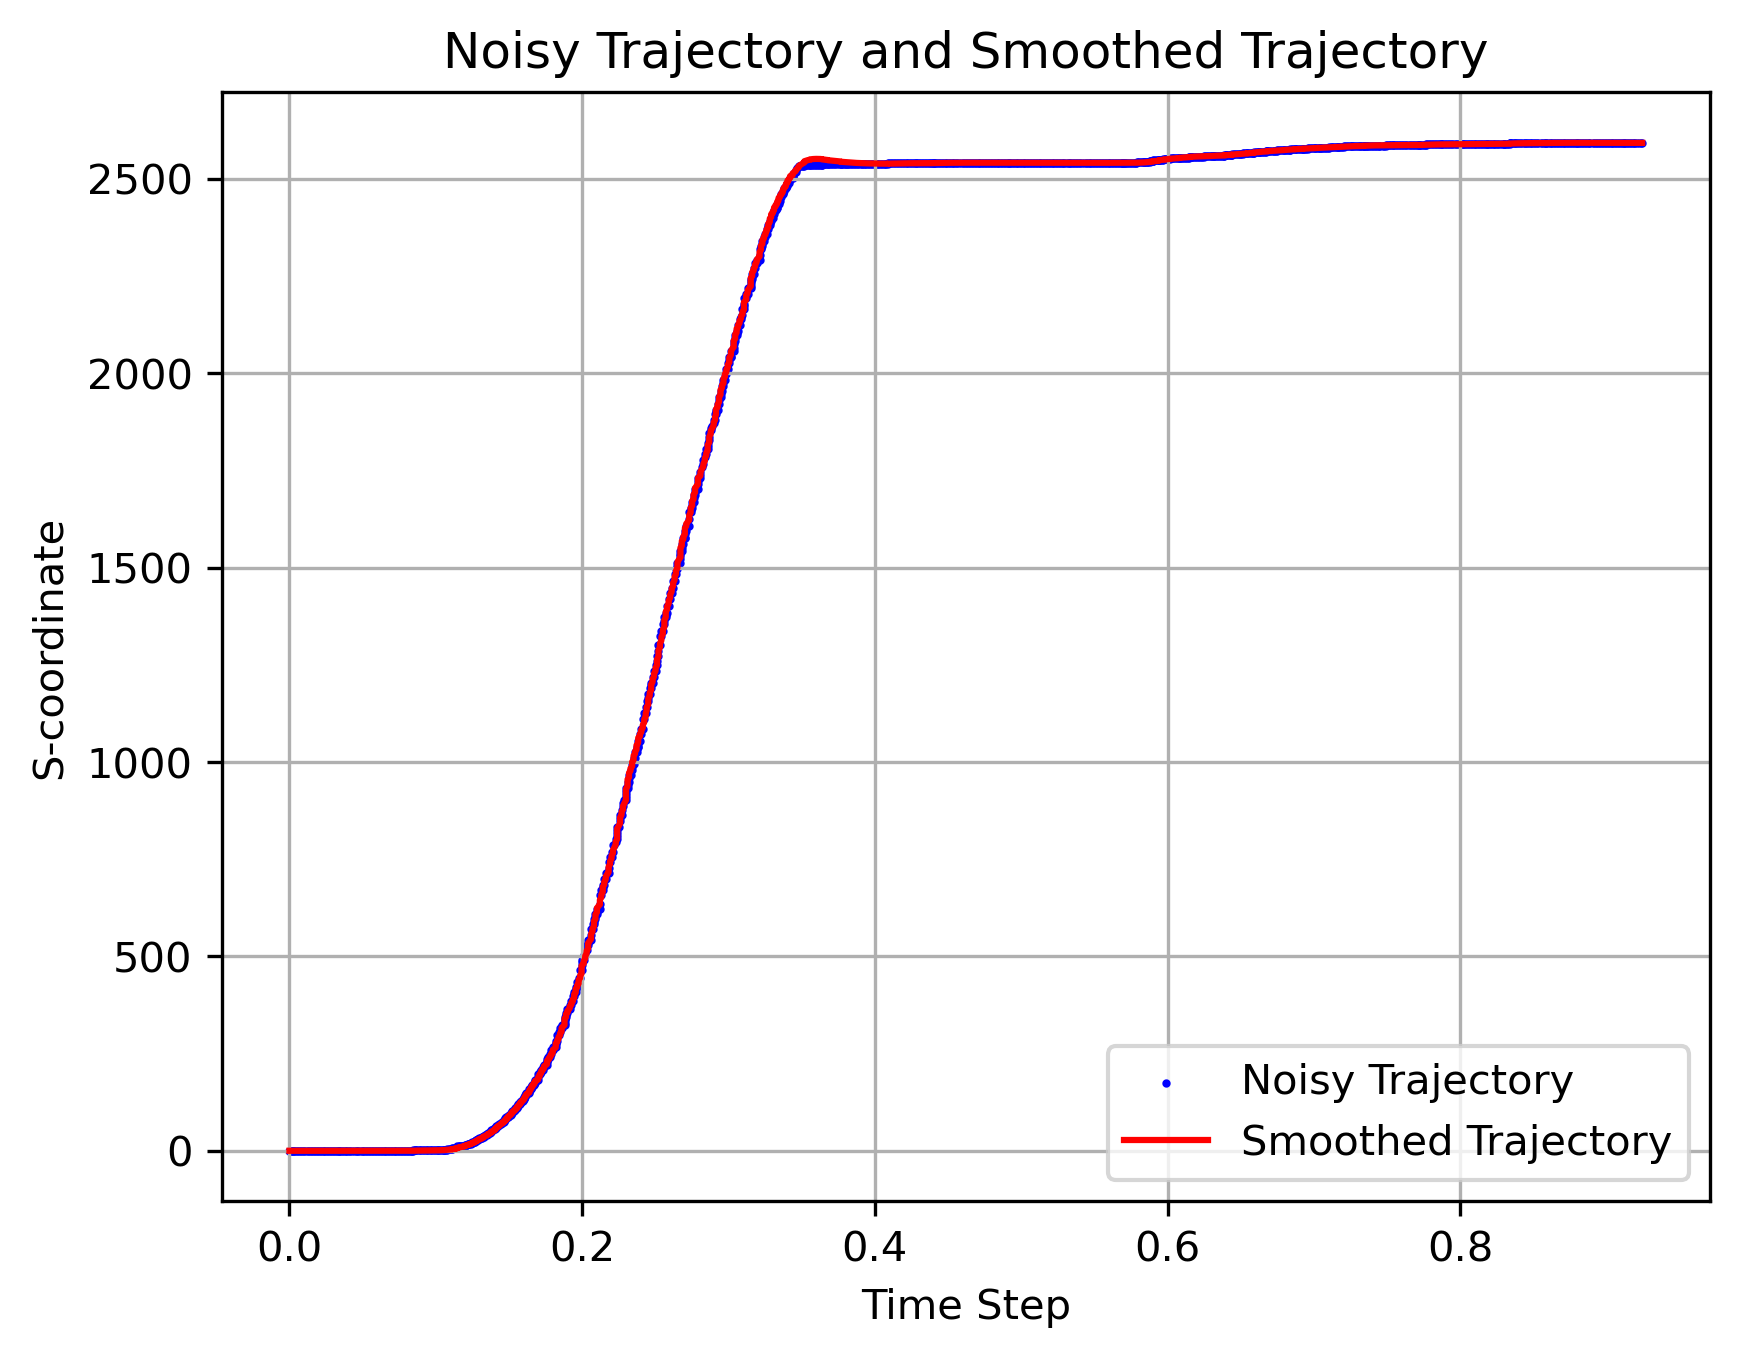

In [456]:
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

def apply_kalman_filter(trajectory, measurement_noise, process_noise):
    # 初始化Kalman滤波器
    kf = KalmanFilter(dim_x=2, dim_z=1)
    
    # 设置状态转移矩阵F，这里假设每一步状态都是从上一步演化而来
    kf.F = np.array([[1., 1.],
                     [0., 1.]])
    
    # 设置测量矩阵H，这里是一个1x2的矩阵，表示从状态空间到测量空间的映射
    kf.H = np.array([[1., 0.]])
    
    # 设置测量噪声矩阵R，这里假设测量噪声是高斯分布
    kf.R = measurement_noise**2
    
    # 设置过程噪声矩阵Q，这里假设过程噪声也是高斯分布
    kf.Q = np.array([[process_noise**2, 0.],
                     [0., process_noise**2]])
    
    # 初始化状态向量x和协方差矩阵P
    kf.x = np.array([trajectory[0][0], 0.])  # 初始位置和速度都设为0
    kf.P = np.eye(2)  # 初始协方差矩阵设为单位矩阵
    
    # 用Kalman滤波器对轨迹数据进行处理
    smoothed_trajectory = [kf.x[0]]  # 用于存储平滑后的轨迹
    for measurement in trajectory[1:]:
        kf.predict()  # 预测下一时刻状态
        kf.update(measurement[1])  # 更新状态，这里只有Y坐标是测量值，X坐标由状态转移矩阵预测得到
        smoothed_trajectory.append(kf.x[0])
    
    return smoothed_trajectory

#trajectory_with_noise = generate_noisy_trajectory(num_points, noise_level)
T=np.array(Track[1]['t'].values.tolist())
S=np.array(Track[1]['s'].values.tolist())

trajectory_with_noise=[]
for i in range(len(T)):
    trajectory_with_noise.append((T[i],S[i]))
# 设置Kalman滤波器的测量噪声和过程噪声
measurement_noise = 15
process_noise = 0.1

# 使用Kalman滤波器对轨迹数据进行降噪处理
S_smoothed = apply_kalman_filter(trajectory_with_noise, measurement_noise, process_noise)

plt.figure(dpi=300)
plt.scatter(T,S, c='b', label='Noisy Trajectory', s=1)
plt.plot(T, S_smoothed, c='r', label='Smoothed Trajectory')
plt.title('Noisy Trajectory and Smoothed Trajectory')
plt.xlabel('Time Step')
plt.ylabel('S-coordinate')
plt.legend()
plt.grid()
plt.show()


使用T与S的关系求V

C:\Users\liuyu\AppData\Local\Temp\ipykernel_26692\3302435123.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  velocities.append(np.abs((distance[i+1]-distance[i]) / (time[i+1] - time[i])))


1364 1364 1364


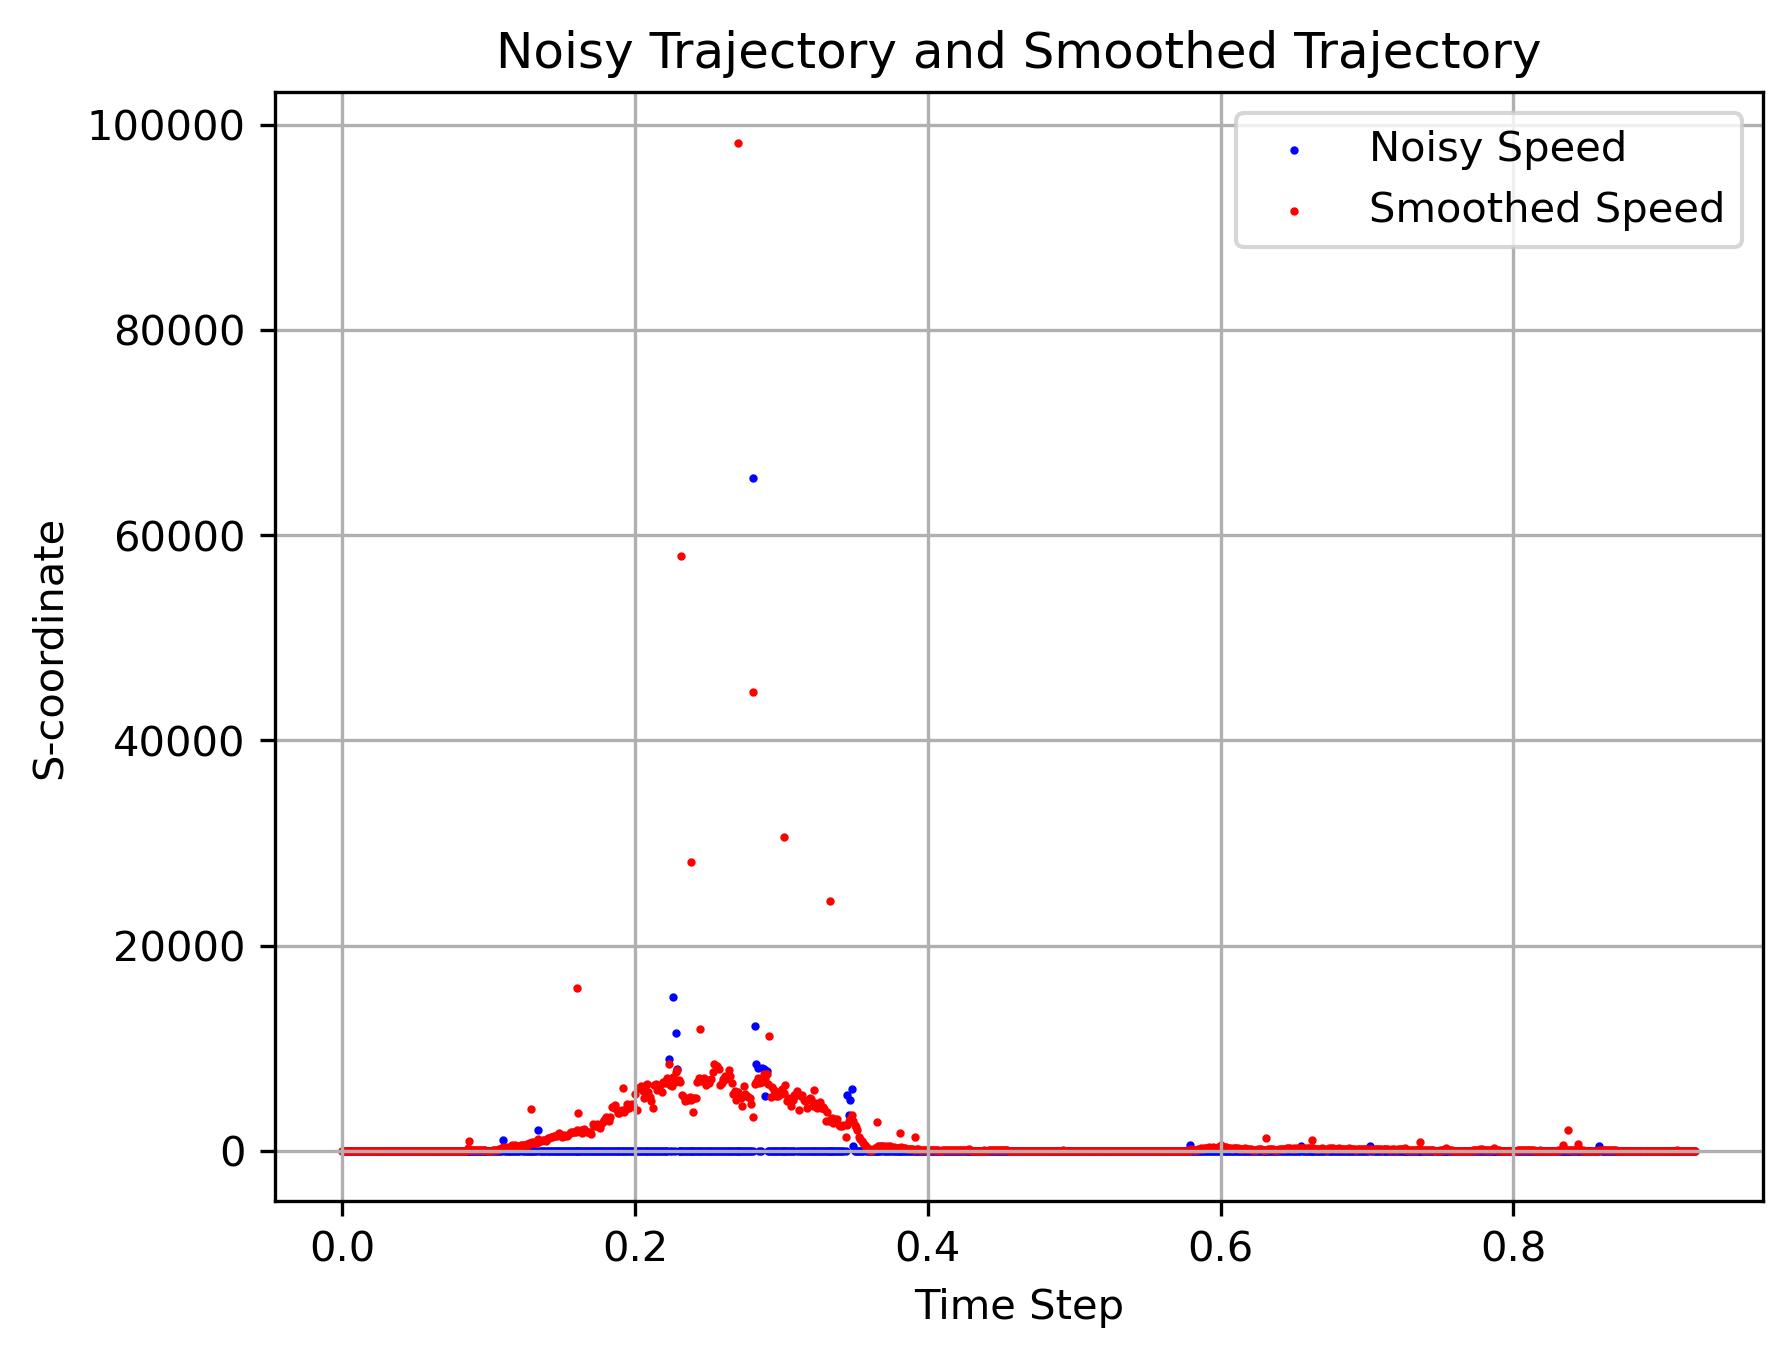

In [457]:
#已知T，S，S_smooth
#求S的一阶导数
def calculate_velocity(time, distance):
    """
    计算速度
    :param time: 时间列表（单位：秒）
    :param distance: 距离列表（单位：米）
    :return: 速度列表（单位：米/秒）
    """
    velocities = [0,]
    for i in range(len(time) - 1):
         velocities.append(np.abs((distance[i+1]-distance[i]) / (time[i+1] - time[i])))
    return velocities


# 计算速度
V = calculate_velocity(T, S)
print(len(V), len(T), len(S))
V_smoothed = calculate_velocity(T, S_smoothed)

# 输出速度列表
plt.figure(dpi=300)
plt.scatter(T,V, c='b', label='Noisy Speed', s=1)
plt.scatter(T,V_smoothed, c='r', label='Smoothed Speed', s=1)
plt.title('Noisy Trajectory and Smoothed Trajectory')
plt.xlabel('Time Step')
plt.ylabel('S-coordinate')
plt.legend()
plt.grid()
plt.show()


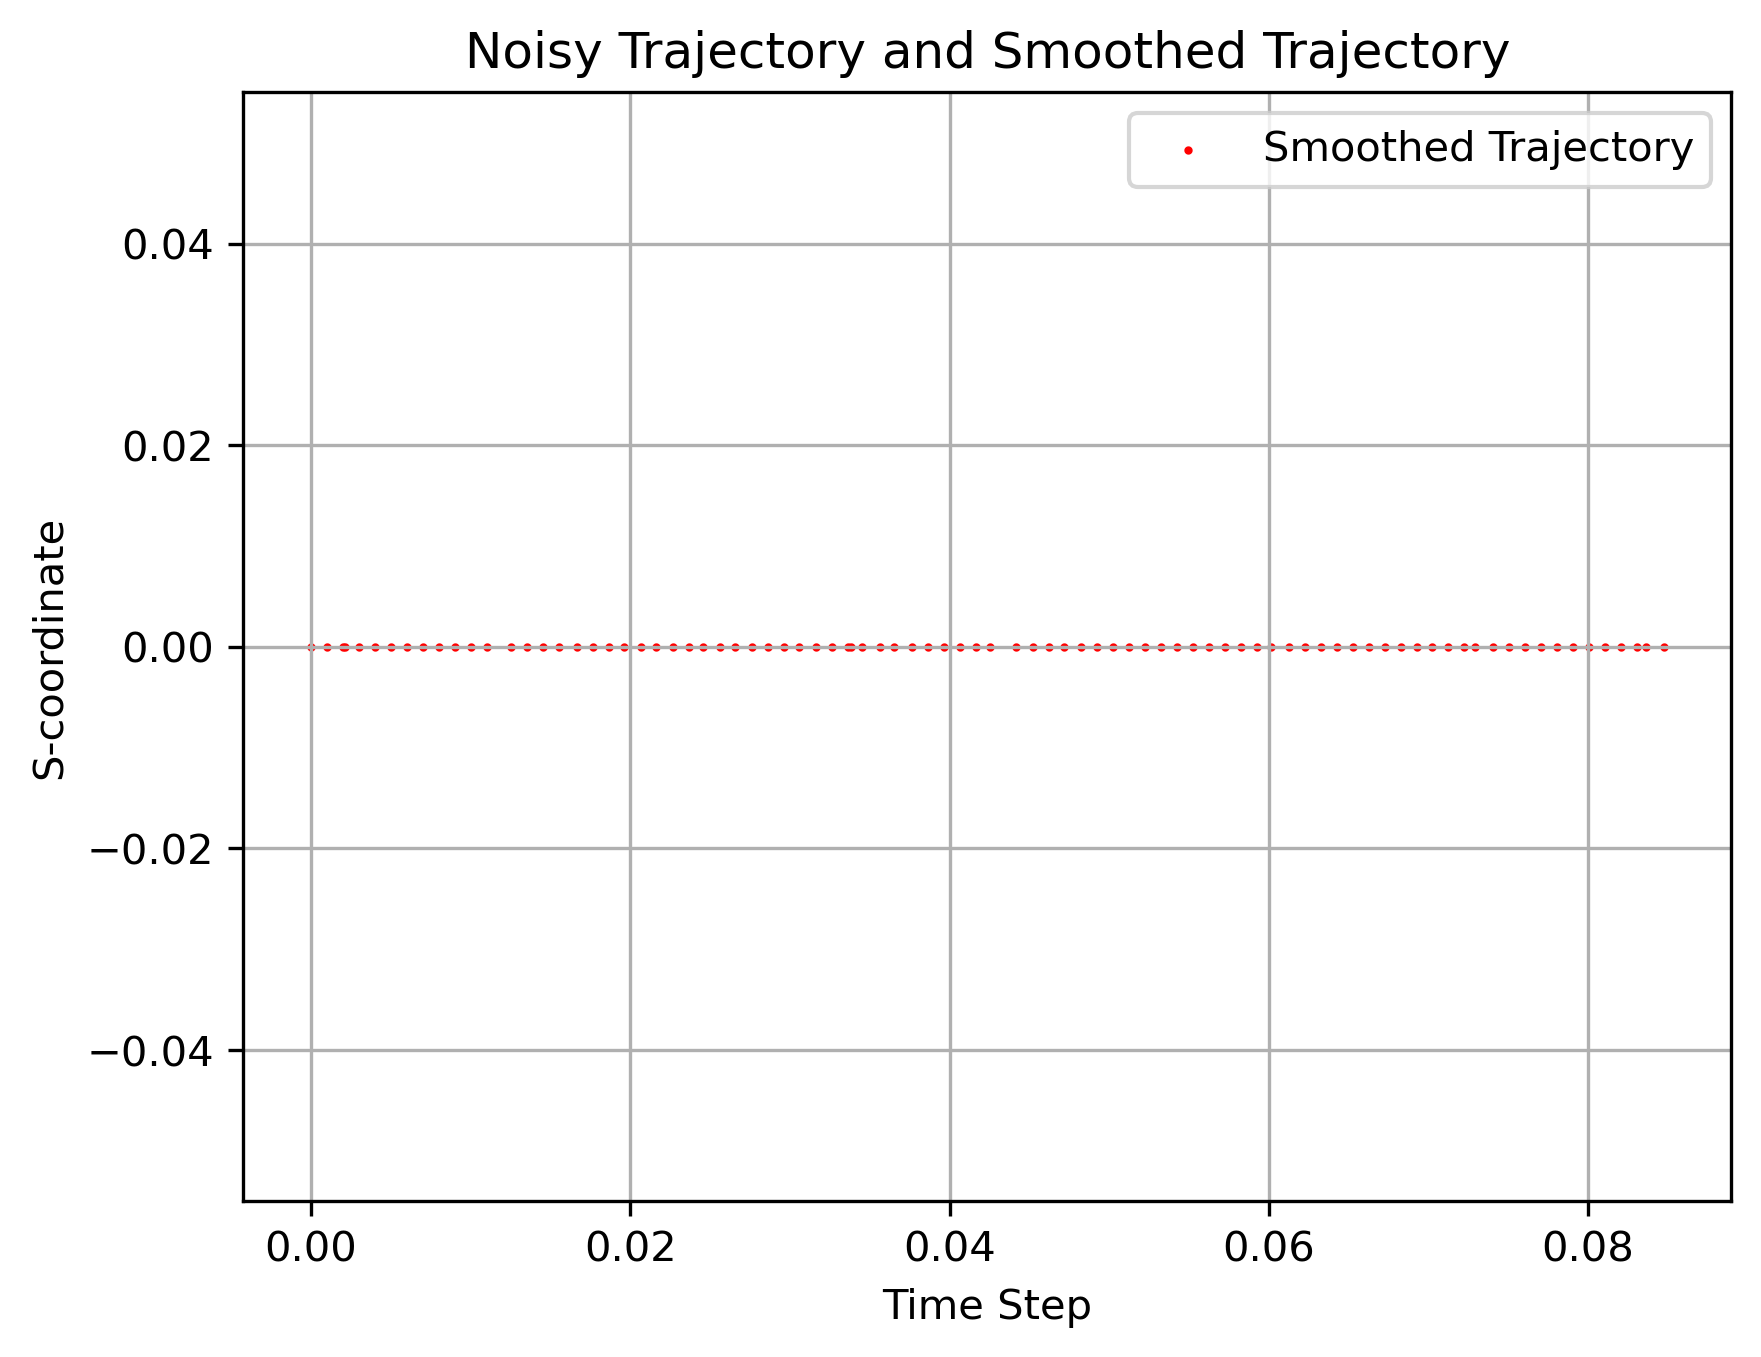

In [458]:
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

trajectory_with_noise=[]
for i in range(len(T)):
    trajectory_with_noise.append((T[i],V_smoothed[i]))
# 设置Kalman滤波器的测量噪声和过程噪声
measurement_noise = 10
process_noise = 0.1

# 使用Kalman滤波器对轨迹数据进行降噪处理
V_smoothed_1 = apply_kalman_filter(trajectory_with_noise, measurement_noise, process_noise)

plt.figure(dpi=300)
#plt.scatter(T,V_smoothed, c='b', label='Noisy Trajectory', s=1)
plt.scatter(T, V_smoothed_1, c='r', label='Smoothed Trajectory',s=1)
plt.title('Noisy Trajectory and Smoothed Trajectory')
plt.xlabel('Time Step')
plt.ylabel('S-coordinate')
plt.legend()
plt.grid()
plt.show()
